In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 6})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
import matplotlib.pyplot as plt
source_path = './source_data/FIG4/'

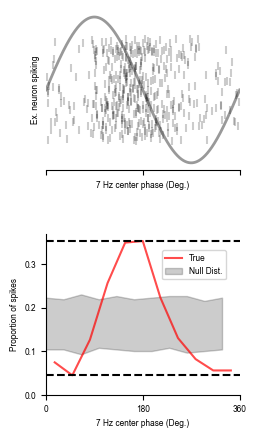

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Example raster plots
# -------------------------
# LOAD (ONLY CHANGE)
# -------------------------
D = np.load(f"{source_path}/schematic_vars.npz", allow_pickle=True)

all_spks = D["all_spks"]
phase_space = D["phase_space"]
binned_res_display = {0: {0: D["binned_res"]}}
binned_ci_display = {0: {0: D["binned_ci"]}}

ex_ind = 0
freq_band = 0

# -------------------------
# ORIGINAL PLOTTING CODE (UNCHANGED)
# -------------------------
fig,axs = plt.subplots(2,1,figsize=(2.5,5),sharex=True,gridspec_kw=dict(hspace=0.4))
ax = axs[0]

rand_y = np.random.random(size=len(all_spks)) - 0.5
ax.scatter(all_spks,rand_y,marker='|',color='k',alpha=0.2)

ax.set(
    xlim=[-np.pi,np.pi],
    yticks=[], yticklabels=[],
    xticks=[-np.pi,0,np.pi],
    xticklabels=[0,180,360],
    ylabel='Ex. neuron spiking',
    xlabel='7 Hz center phase (Deg.)'
)

sns.despine(ax=ax,left=True)

t_ar = np.linspace(-np.pi,np.pi,10000)
ax.plot(t_ar,-1*np.sin(t_ar)/1.4,color='k',alpha=0.4,linewidth=2)

ax = axs[1]

ax.plot(
    phase_space + (phase_space[1] - phase_space[0])/2,
    binned_res_display[ex_ind][freq_band],
    color='r',
    alpha=0.7,
    label='True'
)

ax.fill_between(
    phase_space,
    binned_ci_display[ex_ind][freq_band][:,0],
    binned_ci_display[ex_ind][freq_band][:,1],
    color='k',
    alpha=0.2,
    label='Null Dist.'
)

ax.axhline(np.min(binned_res_display[ex_ind][freq_band]),color='k',linestyle='--')
ax.axhline(np.max(binned_res_display[ex_ind][freq_band]),color='k',linestyle='--')

ax.legend(loc=(0.6,0.72))
ax.set(
    ylabel='Proportion of spikes',
    xlabel='7 Hz center phase (Deg.)',
    yticks=[0.1,0.2,0.3,0]
)

#plt.savefig('./current_composite/schematic_reloaded.jpg',bbox_inches='tight',dpi=300)
plt.show()


[[], Text(0, 0.5, ''), Text(0.5, 0, 'Frequency (Hz)')]

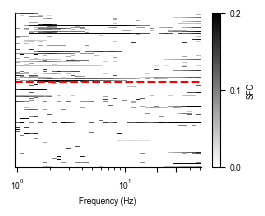

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Heatmap 1
# -------------------------
# LOAD (ONLY CHANGE)
# -------------------------
D = np.load(f"{source_path}/sorted_by_ied_mod_vars.npz", allow_pickle=True)

freqs = D["freqs"]
diff_plt = D["diff_plt"]
cut = D['cut']

# -------------------------
# ORIGINAL PLOTTING CODE (UNCHANGED)
# -------------------------

fig,ax = plt.subplots(figsize=(3,2))
im = ax.pcolormesh(freqs[:75],range(len(diff_plt)),diff_plt,cmap='binary',
              vmin=0,vmax=0.2)
ax.axhline(cut,color='r',linestyle='--')
ax.set_xscale('log')
ax.set_xticks([1,10,20,30])
fig.colorbar(im,label='SFC',ticks=[0,0.1,0.2])
ax.set(yticks=[],ylabel='',xlabel='Frequency (Hz)')
#plt.savefig('./current_composite/sorted_by_ied_mod.jpg',bbox_inches='tight',dpi=300)


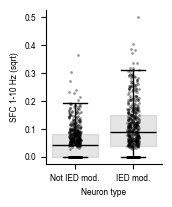

In [4]:
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums
ied_plt_df = pd.read_csv(f'{source_path}/ied_plt_df_mod_nonmod.csv')
fig, ax = plt.subplots(figsize=(1.5,2))
sns.boxplot(ax=ax,data=ied_plt_df,x='Neuron type',
            y='SFC (1-10 Hz)',color='k',boxprops=(dict(alpha=0.1)),fliersize=0)

sns.stripplot(ax=ax,data=ied_plt_df,x='Neuron type',y='SFC (1-10 Hz)'
              ,color='k',s=2,alpha=0.4,zorder=500)


ax.set(ylabel='SFC 1-10 Hz (sqrt)')
ied_plt_df.to_csv('./statistical_source/FIG4/paneld.csv')

#ax.set_yscale('log', base=np.e)

#plt.savefig('current_composite/sfc_lf_by_iedmod.jpg',bbox_inches='tight',dpi=200)


In [5]:
print(ranksums(ied_plt_df.loc[ied_plt_df['Neuron type'] == 'Not IED mod.','SFC (1-10 Hz)'],
               ied_plt_df.loc[ied_plt_df['Neuron type'] == 'IED mod.','SFC (1-10 Hz)']))
print(np.sum(ied_plt_df['Neuron type'] == 'Not IED mod.'))
print(np.sum(ied_plt_df['Neuron type'] == 'IED mod.'))

RanksumsResult(statistic=-11.224940243458546, pvalue=3.075943180242277e-29)
626
513


In [6]:
import numpy as np

# -------------------------
# LOAD
# -------------------------
D = np.load(f"{source_path}/sfc_map_by_nmf_vars.npz", allow_pickle=True)

freqs = D["freqs"]
diff = D["diff"]

class DummyDF:
    pass

new_df = dict(p_mod=D["p_mod"],k_mean_cluster=D["k_mean_cluster"])#DummyDF()
# new_df.p_mod = D["p_mod"]
# new_df.k_mean_cluster = D["k_mean_cluster"]
new_df = pd.DataFrame(new_df)

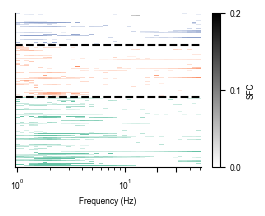

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
#heatmap 2
# Define the base 'Set2' colormap and extract first 3 colors
set2_colors = sns.color_palette("Set2", 8)
custom_colors = [set2_colors[i] for i in range(3)]

def create_custom_colormap(base_color):
    return mcolors.LinearSegmentedColormap.from_list(
        "custom", [(
            1,1,1), base_color], N=256
    )

# Generate three colormaps
colormaps = [create_custom_colormap(color) for color in custom_colors]

# Data selection
is_ied_sig = new_df.p_mod.values < 0.01
diff_ied_only = diff[is_ied_sig, :75]
k_means_groups = new_df[is_ied_sig].k_mean_cluster.values

# Sort indices by group
sorted_indices = np.argsort(k_means_groups)
sorted_groups = k_means_groups[sorted_indices]
sorted_diff = diff_ied_only[sorted_indices]

fig,ax = plt.subplots()
plt.close()

# Create figure
fig, ax = plt.subplots(figsize=(3,2))

# Plot each group separately with its own colormap
unique_groups = np.unique(k_means_groups)

start_idx = 0
for idx, group in enumerate(unique_groups):
    group_mask = (sorted_groups == group)
    group_size = np.sum(group_mask)
    
    im = ax.pcolormesh(
        freqs[:75], 
        range(start_idx, start_idx + group_size), 
        sorted_diff[group_mask], 
        cmap=colormaps[idx], 
        vmin=0, 
        vmax=0.2
    )
    
    start_idx += group_size

    im = ax.pcolormesh(
        freqs[:75], 
        range(502,504), 
        sorted_diff[502:504], 
        cmap='binary', 
        vmin=0, 
        vmax=0.2
    )

# Draw horizontal separation lines
for i in np.where(np.diff(sorted_groups) > 0)[0]: 
    ax.axhline(i, color='k', linestyle='--')

# Set logarithmic scale and labels
ax.set_xscale('log')
ax.set_xticks([1, 10, 20, 30])
ax.set(yticks=[], ylabel='', xlabel='Frequency (Hz)')

# Add a shared colorbar
plt.colorbar(im, label='SFC', ticks=[0, 0.1, 0.2])

# plt.savefig(
#     'current_composite/sfc_map_by_nmf_reloaded.jpg',
#     bbox_inches='tight',
#     dpi=200
# )

plt.show()


/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92227/1082475720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax,data=ied_plt_df,x='K-mean cluster',y='SFC (1-10 Hz)',color='k',boxprops=(dict(alpha=0.3)),
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92227/1082475720.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=ax,data=ied_plt_df,x='K-mean cluster',y='SFC (1-10 Hz)',s=3,alpha=0.4,
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92227/1082475720.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xlabel='',xticklabels=['Early \nact.','Supp.','Lat

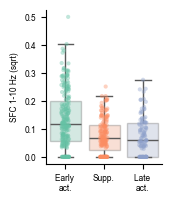

In [8]:
#boxplot/stripplot 2
ied_plt_df = pd.read_csv(f'{source_path}/ied_plt_df_bytype.csv')

fig, ax = plt.subplots(figsize=(1.5,2))
sns.boxplot(ax=ax,data=ied_plt_df,x='K-mean cluster',y='SFC (1-10 Hz)',color='k',boxprops=(dict(alpha=0.3)),
           fliersize=0,palette='Set2')
sns.stripplot(ax=ax,data=ied_plt_df,x='K-mean cluster',y='SFC (1-10 Hz)',s=3,alpha=0.4,
           palette='Set2')
ax.set(xlabel='',xticklabels=['Early \nact.','Supp.','Late \nact.'],ylabel='SFC 1-10 Hz (sqrt)')
#plt.savefig('current_composite/sfc_lf_by_kmean.jpg',bbox_inches='tight',dpi=200)
ied_plt_df.to_csv('./statistical_source/FIG4/panele.csv')


In [9]:
ied_plt_df

,Unnamed: 0,SFC (1-10 Hz),K-mean cluster
0,0,0.115626,1
1,1,0.126018,1
2,2,0.121549,1
3,3,0.045061,1
4,4,0.210145,1
...,...,...,...
507,507,0.000000,3
508,508,0.156905,3
509,509,0.000000,3
510,510,0.123271,3


In [10]:
print(ranksums(ied_plt_df.loc[ied_plt_df['K-mean cluster'] == 1,'SFC (1-10 Hz)'],
               ied_plt_df.loc[ied_plt_df['K-mean cluster'] == 2,'SFC (1-10 Hz)']))
print(ranksums(ied_plt_df.loc[ied_plt_df['K-mean cluster'] == 1,'SFC (1-10 Hz)'],
               ied_plt_df.loc[ied_plt_df['K-mean cluster'] == 3,'SFC (1-10 Hz)']))
print(np.sum(ied_plt_df['K-mean cluster'] == 1))
print(np.sum(ied_plt_df['K-mean cluster'] == 2))
print(np.sum(ied_plt_df['K-mean cluster'] == 3))

RanksumsResult(statistic=5.862079530771302, pvalue=4.571059801582997e-09)
RanksumsResult(statistic=5.124758288819436, pvalue=2.979196887286229e-07)
233
172
107


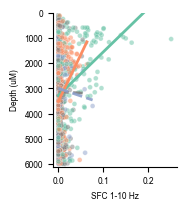

SignificanceResult(statistic=0.07102470657569035, pvalue=0.20226870466577634)
SignificanceResult(statistic=-0.33489906445772044, pvalue=1.9680575320699968e-07)
SignificanceResult(statistic=-0.23893748910736617, pvalue=0.0006354575025927763)
SignificanceResult(statistic=-0.024991771896786693, pvalue=0.7829158977888548)
230
201
124


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
#scatterplot 
new_df = pd.read_csv(f'{source_path}/ied_plt_df_bydepth.csv')

# Define custom colors for clusters (adding grey for NaN cases)
hue_order = list(sns.color_palette('Set2').as_hex())
hue_order = ['grey', hue_order[0], hue_order[1], hue_order[2]]
depth_lim = 6000
# Create figure
fig, ax = plt.subplots(figsize=(1.6,2))

# Plot scatter points
sns.scatterplot(ax=ax, data=new_df[new_df.depth < depth_lim], x='sfc', y='depth', hue='k_mean_cluster', s=12,
                palette=hue_order, hue_order=[0,1,2,3], legend=None, alpha=0.5)

# Add regression lines for each group
alphas = [0.9,1,1,0.9]
linestyles = ['--','-','-','--']
for cluster_id, color in enumerate(hue_order):  # Loop over cluster levels
    subset = new_df[(new_df['k_mean_cluster'] == cluster_id) & (new_df.depth < depth_lim)]
    if not subset.empty:
        sns.regplot(ax=ax, data=subset, x='sfc', y='depth', scatter=False,ci=None,
                    color=color, line_kws={'linewidth': 2, 'alpha': alphas[cluster_id],
                                           'linestyle': linestyles[cluster_id]},x_ci=None)
# Set axis labels and invert y-axis
ax.set(xlabel='SFC 1-10 Hz', ylabel='Depth (uM)',ylim=[0,depth_lim+100])
ax.invert_yaxis()

# Save figure
#plt.savefig('current_composite/sfc_lf_by_depth.jpg', bbox_inches='tight', dpi=200)
plt.show()
reg_df = new_df[new_df.depth < depth_lim]
print(spearmanr(reg_df.sfc[reg_df.k_mean_cluster == 0],
          reg_df.depth[reg_df.k_mean_cluster == 0]))

print(spearmanr(reg_df.sfc[reg_df.k_mean_cluster == 1],
          reg_df.depth[reg_df.k_mean_cluster == 1]))

print(spearmanr(reg_df.sfc[reg_df.k_mean_cluster == 2],
          reg_df.depth[reg_df.k_mean_cluster == 2]))

print(spearmanr(reg_df.sfc[reg_df.k_mean_cluster == 3],
          reg_df.depth[reg_df.k_mean_cluster == 3]))
print(np.sum(reg_df.k_mean_cluster == 1))
print(np.sum(reg_df.k_mean_cluster == 2))
print(np.sum(reg_df.k_mean_cluster == 3))
new_df[new_df.depth < depth_lim].to_csv('./statistical_source/FIG4/panelf.csv')


/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92227/2301465518.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax_box2, data=df2, x='K-mean cluster', y='SFC (1-10 Hz)',
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92227/2301465518.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=ax_box2, data=df2, x='K-mean cluster', y='SFC (1-10 Hz)',
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92227/2301465518.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box2.set(xlabel='', xticklabels=['Early\nact.', 'Supp.', 'Late\nact.'],yticks=[],ylim=[-0.02,0.5]

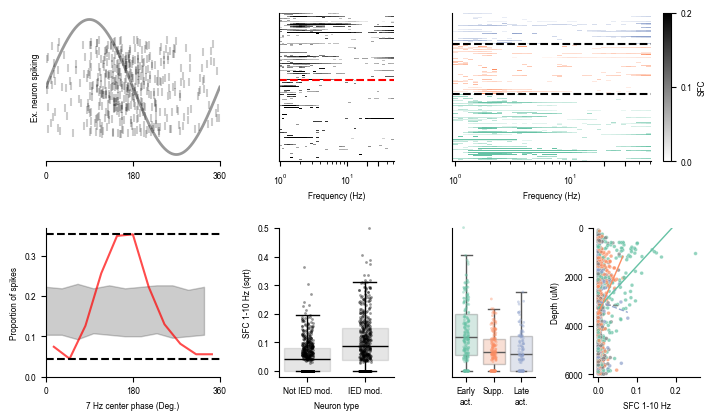

In [12]:
# ============================================================
# COMPOSITE FIGURE: RASTERS + HEATMAPS + BOXPLOTS + SCATTER
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.gridspec import GridSpec

# ------------------------------------------------------------
# MASTER FIGURE / GRID
# ------------------------------------------------------------
fig = plt.figure(figsize=(7, 4))

gs = GridSpec(
    nrows=2,
    ncols=5,
    figure=fig,
    width_ratios=[0.7, 0.7, 1.4, 1, 1.3],
    hspace=0.45,
    wspace=0.7
)
fig.subplots_adjust(left=0.055, right=0.99, top=0.99, bottom=0.08)

# ============================================================
# ROW 1 — RASTER (SPIKES) + HEATMAPS
# ============================================================

# ---- Raster (spikes) ----
ax_raster_top = fig.add_subplot(gs[0, 0:2])

D = np.load(f"{source_path}/schematic_vars.npz", allow_pickle=True)
all_spks = D["all_spks"]
phase_space = D["phase_space"]
binned_res = D["binned_res"]
binned_ci = D["binned_ci"]

rand_y = np.random.random(size=len(all_spks)) - 0.5
ax_raster_top.scatter(all_spks, rand_y, marker='|', color='k', alpha=0.2)

ax_raster_top.set(
    xlim=[-np.pi, np.pi],
    yticks=[],
    xticks=[-np.pi, 0, np.pi],
    xticklabels=[0, 180, 360],
    ylabel='Ex. neuron spiking'
)

sns.despine(ax=ax_raster_top, left=True)

t_ar = np.linspace(-np.pi, np.pi, 10000)
ax_raster_top.plot(t_ar, -np.sin(t_ar)/1.4, color='k', alpha=0.4, linewidth=2)

# ---- Heatmap 1 ----
ax_hm1 = fig.add_subplot(gs[0, 2])

D = np.load(f"{source_path}/sorted_by_ied_mod_vars.npz", allow_pickle=True)
freqs = D["freqs"]
diff_plt = D["diff_plt"]
cut = D["cut"]

im1 = ax_hm1.pcolormesh(freqs[:75], range(len(diff_plt)), diff_plt,
                        cmap='binary', vmin=0, vmax=0.2,rasterized=True)

ax_hm1.axhline(cut, color='r', linestyle='--')
ax_hm1.set_xscale('log')
ax_hm1.set_xticks([1, 10, 20, 30])
ax_hm1.set(yticks=[], xlabel='Frequency (Hz)')
#fig.colorbar(im1, ax=ax_hm1, label='SFC', ticks=[0, 0.1, 0.2])

# ---- Heatmap 2 ----
ax_hm2 = fig.add_subplot(gs[0, 3:5])

D = np.load(f"{source_path}/sfc_map_by_nmf_vars.npz", allow_pickle=True)
freqs = D["freqs"]
diff = D["diff"]
p_mod = D["p_mod"]
k_means = D["k_mean_cluster"]

df = pd.DataFrame(dict(p_mod=p_mod, k_mean_cluster=k_means))

set2 = sns.color_palette("Set2", 3)

def cmap(c):
    return mcolors.LinearSegmentedColormap.from_list("", [(1,1,1), c])

colormaps = [cmap(c) for c in set2]

mask = df.p_mod < 0.01
sorted_idx = np.argsort(df.loc[mask, "k_mean_cluster"])
sorted_diff = diff[mask][sorted_idx]
sorted_groups = df.loc[mask, "k_mean_cluster"].values[sorted_idx]

start = 0
for i, g in enumerate(np.unique(sorted_groups)):
    m = sorted_groups == g
    n = np.sum(m)
    im2 = ax_hm2.pcolormesh(
        freqs[:75],
        range(start, start + n),
        sorted_diff[m],
        cmap=colormaps[i],
        vmin=0,
        vmax=0.2, rasterized=True
    )
    start += n

for i in np.where(np.diff(sorted_groups) > 0)[0]:
    ax_hm2.axhline(i, color='k', linestyle='--')

ax_hm2.set_xscale('log')
ax_hm2.set_xticks([1, 10, 20, 30])
ax_hm2.set(yticks=[], xlabel='Frequency (Hz)')
fig.colorbar(im1, ax=ax_hm2, label='SFC', ticks=[0, 0.1, 0.2])

# ============================================================
# ROW 2 — PROPORTION + BOXPLOTS + SCATTER
# ============================================================

# ---- Proportion of spikes ----
ax_raster_bot = fig.add_subplot(gs[1, 0:2], sharex=ax_raster_top)

ax_raster_bot.plot(
    phase_space + (phase_space[1] - phase_space[0])/2,
    binned_res,
    color='r',
    alpha=0.7
)

ax_raster_bot.fill_between(
    phase_space,
    binned_ci[:, 0],
    binned_ci[:, 1],
    color='k',
    alpha=0.2
)

ax_raster_bot.axhline(np.min(binned_res), color='k', linestyle='--')
ax_raster_bot.axhline(np.max(binned_res), color='k', linestyle='--')

ax_raster_bot.set(
    ylabel='Proportion of spikes',
    xlabel='7 Hz center phase (Deg.)',
    yticks=[0, 0.1, 0.2, 0.3]
)

# ---- Boxplot 1 ----
ax_box1 = fig.add_subplot(gs[1, 2])
df1 = pd.read_csv(f'{source_path}/ied_plt_df_mod_nonmod.csv')

sns.boxplot(ax=ax_box1, data=df1, x='Neuron type', y='SFC (1-10 Hz)',
            color='k', boxprops=dict(alpha=0.1), fliersize=0)
sns.stripplot(ax=ax_box1, data=df1, x='Neuron type', y='SFC (1-10 Hz)',
              color='k', s=2, alpha=0.4,clip_on=False)

ax_box1.set(ylabel='SFC 1-10 Hz (sqrt)',ylim=[-0.02,0.5])

# ---- Boxplot 2 ----
ax_box2 = fig.add_subplot(gs[1, 3])
df2 = pd.read_csv(f'{source_path}/ied_plt_df_bytype.csv')

sns.boxplot(ax=ax_box2, data=df2, x='K-mean cluster', y='SFC (1-10 Hz)',
            palette='Set2', boxprops=dict(alpha=0.3), fliersize=0)
sns.stripplot(ax=ax_box2, data=df2, x='K-mean cluster', y='SFC (1-10 Hz)',
              palette='Set2', s=2, alpha=0.4,clip_on=False)

ax_box2.set(xlabel='', xticklabels=['Early\nact.', 'Supp.', 'Late\nact.'],yticks=[],ylim=[-0.02,0.5],ylabel='')

# ---- Scatter ----
new_df = pd.read_csv(f'{source_path}/ied_plt_df_bydepth.csv')

# Define custom colors for clusters (adding grey for NaN cases)
hue_order = list(sns.color_palette('Set2').as_hex())
hue_order = ['grey', hue_order[0], hue_order[1], hue_order[2]]
depth_lim = 6000
# Create figure
ax = fig.add_subplot(gs[1, 4])
# Plot scatter points
sns.scatterplot(ax=ax, data=new_df[new_df.depth < depth_lim], x='sfc', y='depth', hue='k_mean_cluster', s=7,
                palette=hue_order, hue_order=[0,1,2,3], legend=None, alpha=0.7)

# Add regression lines for each group
alphas = [0.9,1,1,0.9]
linestyles = ['--','-','-','--']
for cluster_id, color in enumerate(hue_order):  # Loop over cluster levels
    subset = new_df[(new_df['k_mean_cluster'] == cluster_id) & (new_df.depth < depth_lim)]
    if not subset.empty:
        sns.regplot(ax=ax, data=subset, x='sfc', y='depth', scatter=False,ci=None,
                    color=color, line_kws={'linewidth': 1, 'alpha': alphas[cluster_id],
                                           'linestyle': linestyles[cluster_id]},x_ci=None)
# Set axis labels and invert y-axis
ax.set(xlabel='SFC 1-10 Hz', ylabel='Depth (uM)',ylim=[0,depth_lim+100],yticks=[0,2000,4000,6000])
ax.invert_yaxis()

# ------------------------------------------------------------
# SAVE
# ------------------------------------------------------------
# plt.savefig(
#     "./current_composite/fig4.pdf", transparent=True,
#     dpi=800,
# )
